In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, IPython.display as ipd, numpy
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

# Peak Picking

Peak picking is the act of locating peaks in a signal. For example, in onset detection, we may want to find peaks in a novelty function. These peaks would correspond to the musical onsets.

Let's load an example audio file.

In [2]:
x, sr = librosa.load('audio/58bpm.wav')

In [3]:
print(x.shape, sr)

(182464,) 22050


Listen to the audio file:

In [4]:
ipd.Audio(x, rate=sr)

Plot the signal:

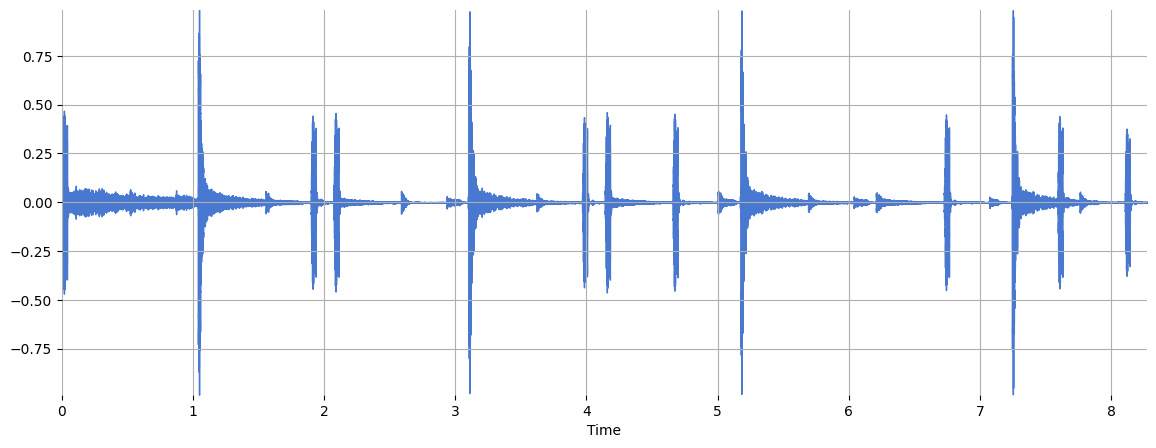

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y=x, sr=sr);

Compute an onset envelope:

In [6]:
hop_length = 256
onset_envelope = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)

In [7]:
onset_envelope.shape

(713,)

Generate a time variable:

In [8]:
N = len(x)
T = N/float(sr)
t = numpy.linspace(0, T, len(onset_envelope))

Plot the onset envelope:

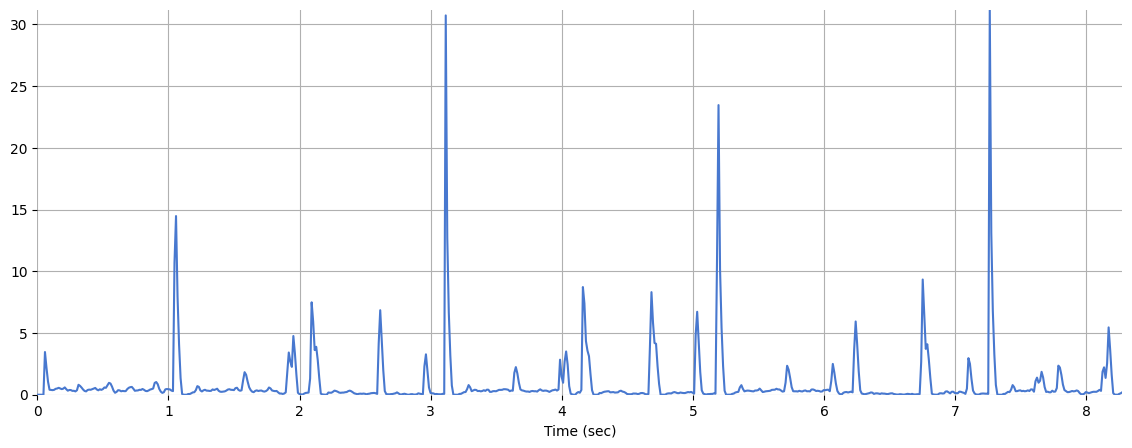

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.xlabel('Time (sec)')
plt.xlim(xmin=0)
plt.ylim(0);

In this onset strength envelope, we clearly see many peaks. Some correspond to onsets, and others don't. How do we create peak picker that will detect true peaks while avoiding unwanted spurious peaks?

`librosa.util` has a [`peak_pick`](https://librosa.github.io/librosa/generated/librosa.util.peak_pick.html#librosa-util-peak-pick) method. We can control the parameters based upon our signal. Let's see how it works:

    def peak_pick(x, pre_max, post_max, pre_avg, post_avg, delta, wait):
        '''Uses a flexible heuristic to pick peaks in a signal.

        A sample n is selected as a peak if the corresponding x[n]
        fulfills the following three conditions:

        1. `x[n] == max(x[n - pre_max:n + post_max])`
        2. `x[n] >= mean(x[n - pre_avg:n + post_avg]) + delta`
        3. `n - previous_n > wait`

        where `previous_n` is the last sample picked as a peak (greedily).

This implementation is based on [Boeck, Sebastian, Florian Krebs, and Markus Schedl. “Evaluating the Online Capabilities of Onset Detection Methods.” ISMIR. 2012.](http://www.cp.jku.at/research/papers/Boeck_etal_ISMIR_2012.pdf)

Get the frame indices of the peaks:

In [10]:
onset_frames = librosa.util.peak_pick(x=onset_envelope, pre_max=7, post_max=7, pre_avg=7, post_avg=7, delta=0.5, wait=5)

In [11]:
onset_frames

array([  5,  78,  91, 136, 168, 180, 225, 255, 268, 314, 347, 358, 403,
       433, 447, 492, 522, 537, 581, 611, 625, 659, 670, 703])

Plot the onset envelope along with the detected peaks:

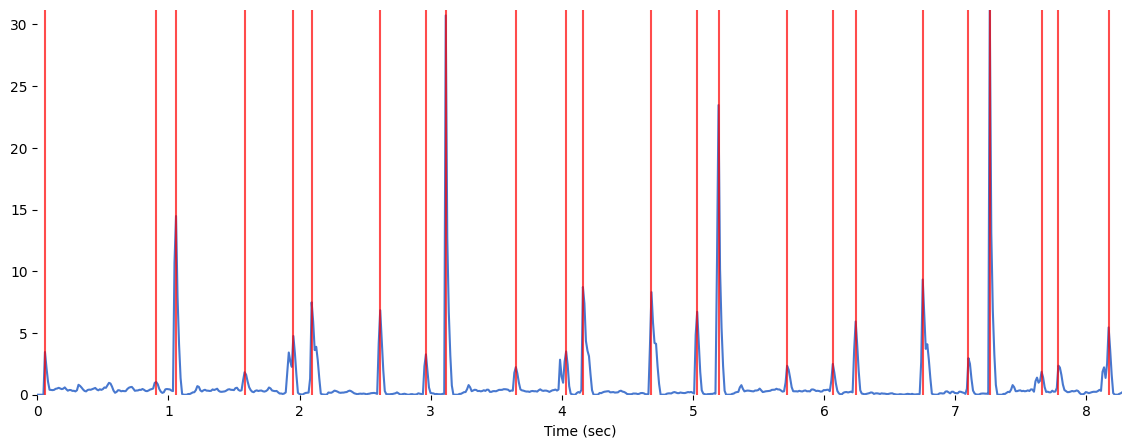

In [12]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.grid(False)
plt.vlines(t[onset_frames], 0, onset_envelope.max(), color='r', alpha=0.7)
plt.xlabel('Time (sec)')
plt.xlim(0, T)
plt.ylim(0);

Superimpose a click track upon the original:

In [13]:
clicks = librosa.clicks(frames=onset_frames, sr=22050, hop_length=hop_length, length=N)

In [14]:
ipd.Audio(x+clicks, rate=sr)

Using the parameters above, we find that the peak picking algorithm seems to have high precision, e.g. few false positives. However, recall can be improved, i.e. it is missing several onsets that actually occur in the audio signal.

## Questions

Adjust the hop length from 512 to 256 or 1024. How does that affect the onset envelope, and consequently, the peak picking?

Adjust the `peak_pick` parameters, `pre_max`, `post_max`, `pre_avg`, `post_avg`, `delta`, and `wait`. How do the detected peaks change?

Try this notebook again on other audio files:

In [15]:
ls audio

125_bounce.wav                  jangle_pop.mp3
58bpm.wav                       latin_groove.mp3
README.md                       oboe_c6.wav
brahms_hungarian_dance_5.mp3    prelude_cmaj.wav
busta_rhymes_hits_for_days.mp3  simple_loop.wav
c_strum.wav                     simple_piano.wav
clarinet_c6.wav                 sir_duke_piano_fast.mp3
classic_rock_beat.mp3           sir_duke_piano_slow.mp3
classic_rock_beat.wav           sir_duke_trumpet_fast.mp3
conga_groove.wav                sir_duke_trumpet_slow.mp3
cowbell.wav                     thx_original.mp3
drum_samples/                   tone_440.wav
funk_groove.mp3


[&larr; Back to Index](index.html)